# Aprendizado supervisionado

## Visão geral das aulas de laboratório

### Exemplo de problema de regressão

Carregando bibliotecas.

In [115]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import load_iris

# Exemplo de problema de regressão
Carregando base de dados

In [116]:
california_housing = fetch_california_housing()

Convertendo o conjunto de dados em um DataFrame do Pandas.

In [117]:
california_df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
california_df['PRICE'] = california_housing.target

Escolhendo a variável independente (atributo) e dependente (variável de destino).


In [118]:
X = california_df[['MedInc']]  # Média de renda dos habitantes
y = california_df['PRICE']  # Preço das casas

Dividindo os dados em conjuntos de treino e teste

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=9)

In [120]:
X_train.head()

,MedInc
19988,3.4231
16872,5.8783
312,2.0469
3972,3.3125
19664,3.5547


Definindo modelo de regressão linear.

In [121]:
model = LinearRegression()

Treinando o modelo com os dados de treino.

In [122]:
model.fit(X_train, y_train)

LinearRegression()

Coeficientes de regressão.

In [123]:
print("Coeficientes do modelo:")
print("Intercepto:", model.intercept_)
print("Coeficiente de inclinação:", model.coef_[0])

Coeficientes do modelo:
Intercepto: 0.4529063499257635
Coeficiente de inclinação: 0.4183280369016925


Realizando previsão com o modelo.

In [124]:
renda_new = 5
prediction = model.predict([[renda]])
print("Previsão para renda =", renda_new, ":", prediction)

Previsão para renda = 5 : [2.54454653]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Fazendo previsões com o modelo.

In [125]:
y_pred = model.predict(X_test)
y_pred

array([2.35738657, 2.90184051, 1.2651739 , ..., 2.18599757, 1.25555235,
       1.97528574])

Previsão para todos dados de teste.

In [126]:
Preco_test = pd.concat([X_test, y_test], axis=1)
Preco_test['exp_pred'] = model.predict(X_test)

Visualizando a regressão linear.

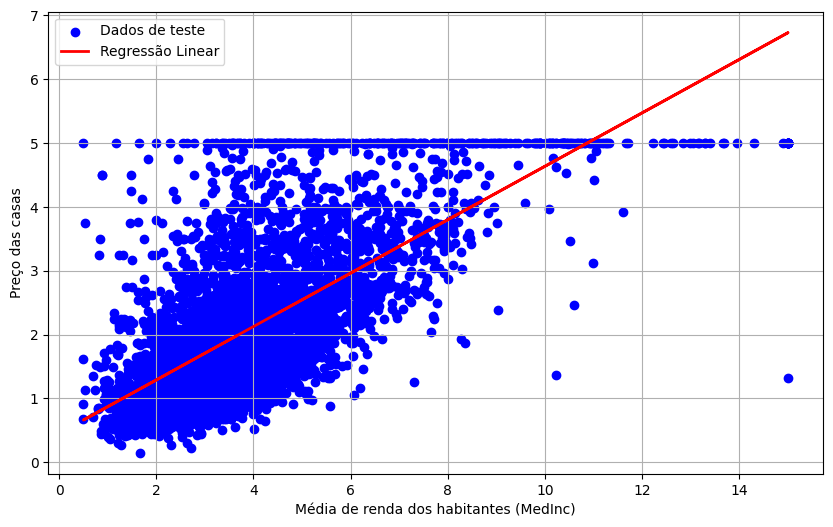

In [127]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Dados de teste')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regressão Linear')
#plt.title('Regressão Linear Simples - Preço das Casas na Califórnia')
plt.xlabel('Média de renda dos habitantes (MedInc)')
plt.ylabel('Preço das casas')
plt.legend()
plt.grid(True)
plt.show()

Métricas de desempenho.

In [128]:
def metrics(obs, pred):
    rmse = np.sqrt(mean_squared_error(obs, pred))
    mae = mean_absolute_error(obs, pred)
    r2 = r2_score(obs, pred)
    return pd.DataFrame({'RMSE': [rmse], 'MAE': [mae], 'R²': [r2]})

Desempenho do modelo para dados de teste.

In [129]:
print("Desempenho do modelo para dados de teste:")
print(metrics(y_test, Preco_test['exp_pred']))

Desempenho do modelo para dados de teste:
       RMSE       MAE        R²
0  0.841105  0.625373  0.470823


# Exemplo de problema de classificação

Carregando base de dados.

In [224]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

Selecionando apenas as classes 1 e 2 (binária).

In [225]:
iris_df_binary = iris_df[iris_df['target'].isin([1,2])]

Usando apenas a largura da pétala como variável independente.

In [226]:
X = iris_df_binary[['petal width (cm)']]
y = iris_df_binary['target']
y = y-1

Dividindo os dados em conjuntos de treino e teste.

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [228]:
y_train

147    1
101    1
80     0
124    1
146    1
      ..
133    1
117    1
75     0
118    1
97     0
Name: target, Length: 75, dtype: int64

Obtendo um modelo de regressão logística simples.

In [229]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [230]:
print("Coeficientes do modelo:")
print("Intercepto:", model.intercept_)
print("Coeficiente de inclinação:", model.coef_)

Coeficientes do modelo:
Intercepto: [-6.08037277]
Coeficiente de inclinação: [[3.77070842]]


Fazendo previsões com o modelo.

In [231]:
y_pred = model.predict(X_test)

Avaliando o modelo.

In [232]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)

Acurácia do modelo: 0.96


Plotando a matriz de confusão.

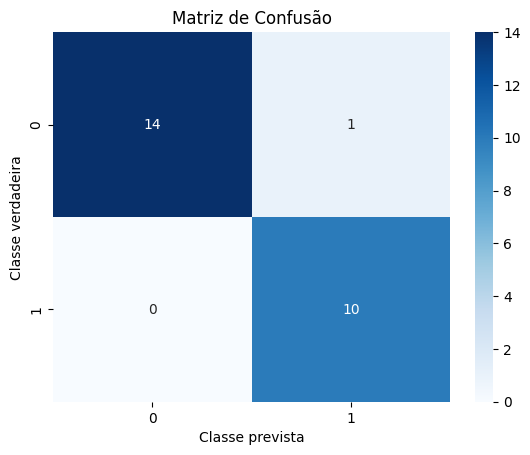

In [233]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Classe prevista')
plt.ylabel('Classe verdadeira')
plt.title('Matriz de Confusão')
plt.show()

Plotando a curva de decisão estimada pelo modelo com dados de treino.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


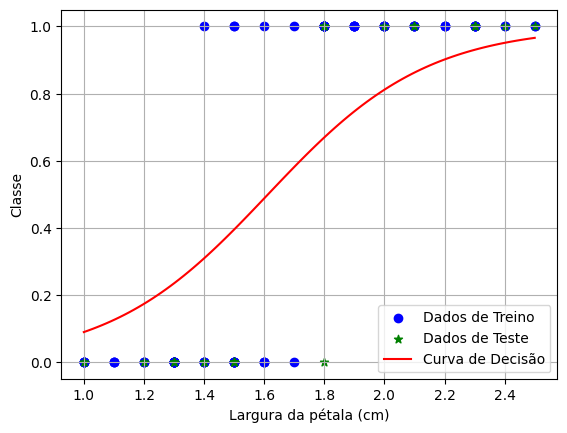

In [234]:
plt.scatter(X_train.values.flatten(), y_train, color='blue', label='Dados de Treino')
plt.scatter(X_test.values.flatten(), y_test, color='green', label='Dados de Teste',marker="*")
X_line = np.linspace(X_train.min(), X_train.max(), 100)
decision_boundary = model.predict_proba(X_line.reshape(-1, 1))[:, 1]
plt.plot(X_line, decision_boundary, color='red', label='Curva de Decisão')

plt.xlabel('Largura da pétala (cm)')
plt.ylabel('Classe')
#plt.title('Regressão Logística Binária com Largura da Pétala')
plt.legend()
plt.grid(True)
plt.show()